In [161]:
import snscrape.modules.twitter as sntwitter
import urllib.request
import json


# Creating an empty list for adding the twiter data into
hw_tweets_1 =[]
# setting i to zero so we can use it as a break point.
i = 0
# using .get_items() to to pull all twitter data for our selected topic.
for tweet in sntwitter.TwitterSearchScraper("Artificial Intelligence").get_items():  
    if i>1000: #selecting a number where when i is greater than it stops the loop.
        break
    # selecting the field we want to pull in from the data and placing them in a dictionary 
    # placing that created dictionary into the empty list created at the start.
    hw_tweets_1.append(tweet.content)
    i= i + 1 #each loop preformed adds one to i.
print(len(hw_tweets_1))

1001


In [162]:
#manual inspection of tweets for data preparation
hw_tweets_1[:10]

['Biases in #ArtificialIntelligence Led to #Healthcare Disparities\n#AI #AIio #BigData #ML #Healthai\n\n@CRudinschi @AntonioSelas @alexjc @RobotLaunch @karpathy @andyjankowski @bobgourley @CadeMetz https://t.co/dCIHhCYDNK https://t.co/xo0ZlDJpwO',
 'Biases in #ArtificialIntelligence Led to #Healthcare Disparities\n#AI #AIio #BigData #ML #Healthai https://t.co/02Fp7GYJtx',
 'Artificial Intelligence uses a fair amount of resources, including data storage. Is cloud storage going to control that aspect of AI?\n\n#AI #ML #futurism #IntelligenceFactory #digitaltransformation #DX\n\nhttps://t.co/PGVmRP94Fb',
 'Research Paves the Way for Honey-Based Neuromorphic Computing https://t.co/4E9DbEA5nS #DL #AI #ML #DeepLearning  #ArtificialIntelligence #MachineLearning #ComputerVision #AutonomousVehicles #NeuroMorphic #Robotics',
 'Artificial Intelligence uses a fair amount of resources, including data storage. Is cloud storage going to control that aspect of AI?\n\n#AI #ML #futurism #IntelligenceFac

In [163]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#setting an empty list to save the compound scores into.
vs_list_compound = [] 
#Looping through to get a compound score for each tweet saving it into the compund list created.
for tweet in hw_tweets_1:
    vs = analyzer.polarity_scores(tweet)
    vs_list = vs['compound']
    vs_list_compound.append(vs_list) 
    print(tweet, '\n',str(vs))

Biases in #ArtificialIntelligence Led to #Healthcare Disparities
#AI #AIio #BigData #ML #Healthai

@CRudinschi @AntonioSelas @alexjc @RobotLaunch @karpathy @andyjankowski @bobgourley @CadeMetz https://t.co/dCIHhCYDNK https://t.co/xo0ZlDJpwO 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Biases in #ArtificialIntelligence Led to #Healthcare Disparities
#AI #AIio #BigData #ML #Healthai https://t.co/02Fp7GYJtx 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Artificial Intelligence uses a fair amount of resources, including data storage. Is cloud storage going to control that aspect of AI?

#AI #ML #futurism #IntelligenceFactory #digitaltransformation #DX

https://t.co/PGVmRP94Fb 
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.6597}
Research Paves the Way for Honey-Based Neuromorphic Computing https://t.co/4E9DbEA5nS #DL #AI #ML #DeepLearning  #ArtificialIntelligence #MachineLearning #ComputerVision #AutonomousVehicles #NeuroMorphic #Robotics 
 {'neg': 0.0, 'neu': 

    https://t.co/JF14sfB4Bm 
 {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}
I am told on voice to skull what I learned online, that there are two timelines processed by artificial intelligence. When events are carried over between timelines, they collapse and they call these twin flame events residue, like karma, why my new house looks like my boyfriends https://t.co/j8HOdhQEtL 
 {'neg': 0.058, 'neu': 0.796, 'pos': 0.146, 'compound': 0.5994}
This project turns your text prompt into a 3D model for #gaming and #Metaverse !

Quick read on the approach: https://t.co/3L3PkeA61x

#3D #3dmodeling #NeuralNetworks #ML #ArtificialIntelligence #NFT #games #research https://t.co/73wN1gZRtq 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Multinomial Naїve Bayes’ For Documents Classification and Natural Language Processing (NLP) https://t.co/KStUJ53vN8 #analytics #datascience, #artificialintelligence, #bi, #bigdata, #dataengineering, #datagovernance, #datamanagement, #dataqual

In [165]:
import numpy as np
#creating a names list for graphing
names=[]
#Looping though the coumound scores list to create a tweet name for the graph use.
i = 0
for item in vs_list_compound:
    names.append('T'+str(i))
    i=(i+1)
#displaying information to show it worked 1 name for each tweet and to see some examples of the created names.
    print(len(names))
print(names[:10])

1001
['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']


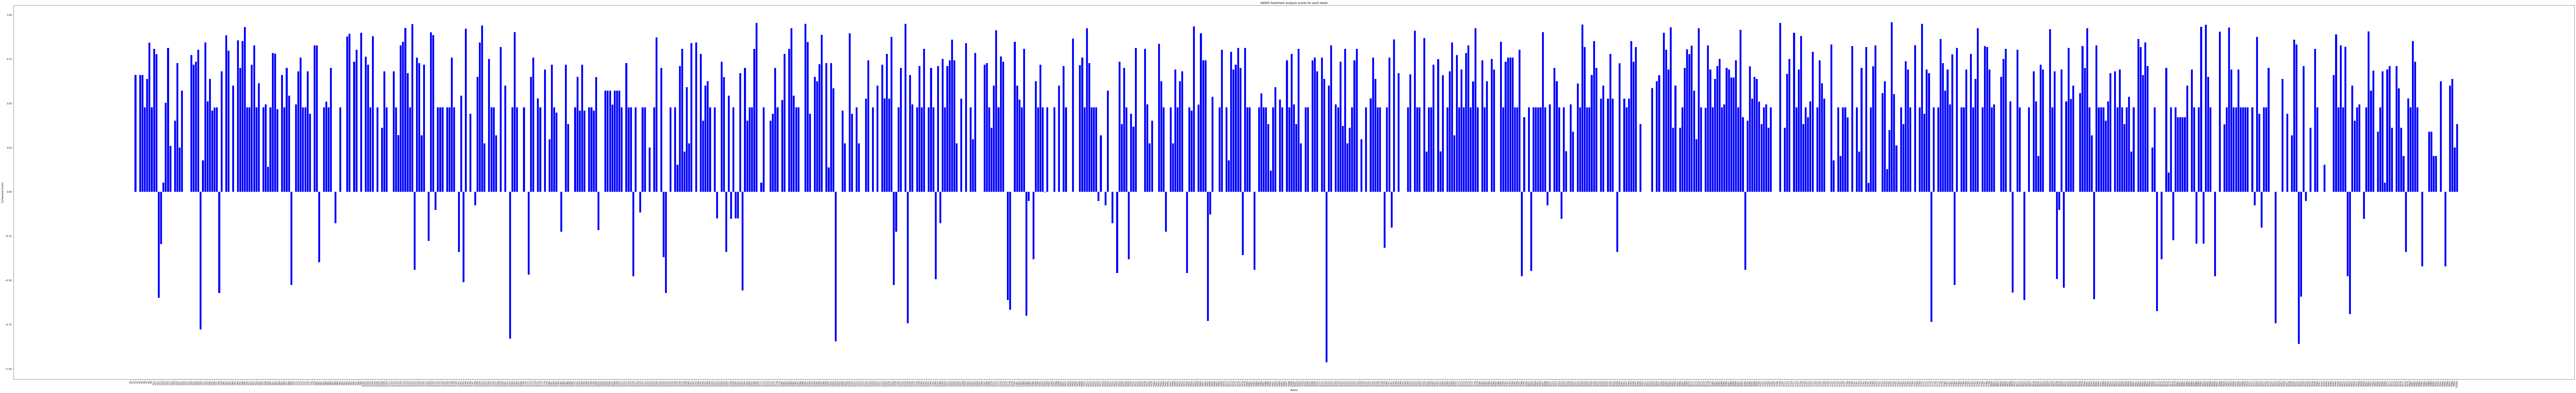

In [242]:
import matplotlib.pyplot as plt
import numpy as np

#setting the y to the compound scores
values = vs_list_compound

#addjusting figure size
fig = plt.figure(figsize = (200, 30))
 

#Rotating the x axis names
plt.xticks(rotation=90)
#plotting the graph in blue
plt.bar(names,values,color='blue', width = 0.8)
#labeling the graph
plt.ylabel('Compound Scores')
plt.xlabel('Tweets')
plt.title("VADER Sentiment analysis scores for each tweet")

plt.show()

In [244]:
#looping through the compound scores to select the 3 highest
for num in vs_list_compound:
    if num > 0.9485:
        print('Compound Score:',num,'Index', vs_list_compound.index(num))

Compound Score: 0.9535 Index 269
Compound Score: 0.9536 Index 709
Compound Score: 0.9582 Index 757


In [185]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[269]

'Are you a fan of John Abraham? \nAre you a fan of Artificial intelligence? \nAre you a fan of Indian research organisations? \nN a big one - Are you a fan of full on action? \nThen! go n watch. #Attackmovie @TheJohnAbraham \nHollywood ko appreciate krte ho.. ise bhi kardo. 😎 https://t.co/4c6MOxRjT2'

In [186]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[709]

'The Movie \'Her\' left me with a profound dilemma, "Can there be an objective moral reality to judge every being capable of expressing the freedom of choice? and when we succeed in creating an Artificial Intelligence should it be considered free from this ultimate moral reality?"'

In [187]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[757]

'It was a great pleasure and Honor to meet Dr Jitendra Singh, Union Minister of State, Prime Minister’s office and Independent Charge Science &amp; Technology Department, Govt of India. So glad to learn about the initiatives of Indian Government in the field of Artificial Intelligence'

In [283]:
#looping through the compound scores to select the 3 lowest
for num in vs_list_compound:
    if num < -0.8301:
        print('Compound Score:',num,'Index', vs_list_compound.index(num))

Compound Score: -0.8454 Index 303
Compound Score: -0.9637 Index 514
Compound Score: -0.8599 Index 932


In [190]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[303]

"So during my kidney surgery I got programmed to lose my cranial cap so it could infect my brain directly into my brain so it wouldn't allow any stimulation and so my skin would get infected with an artificial intelligence from a cancer patient mannequin"

In [191]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[514]

'.....(continued from #14 .....🔥🔥Concentration Camps, 🔥🔥Torture, 🔥🔥and Abuse🔥🔥 and that the risks of 🔥🔥Artificial Intelligence is multi-faceted and enormous.🔥🔥'

In [192]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[932]

'Sister Melissa in Christ shares WARNING Dream: Mother of Harlots - Is She Harming YOU? End-Times Religious System Rising!\nhttps://t.co/UsMHJsntZv\n#PodernFamily #Jesus #EndTimes #warning #vision #AI #ArtificialIntelligence #deception #beastsystem #alarm #HolySpirit'

In [201]:
import flair
#selecting the flair sentiment model
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2022-04-10 13:41:35,386 loading file C:\Users\Morga\.flair\models\sentiment-en-mix-distillbert_4.pt


In [281]:
#Defining a function that allocates a score to each tweet
def flair_score(tweet):
    # identifing the sentences
    sent = flair.data.Sentence(tweet)
    #predicting the score of each sentence
    flair_sentiment.predict(sent)
    #finding the total sentiment
    total_sentiment = sent.labels[0]
    #creating a numeric representation of positive or negative sentiment
    if total_sentiment.value == 'NEGATIVE':
        sign = -1 
    else:
        sign = 1
    #selecting the numeric score of the FLAIR predictions     
    score = total_sentiment.score
    #multiplying the numeric representation of neg or pos sentiment by the score preidcted by FLAIR
    return sign * score


In [268]:
# creating a list for the flair scores to be stored into
flair_list_compound = [] 
#looping the tweet list though the flair function to have a score for each and adding it to the flair score list.
for tweet in hw_tweets_1:
    fs = flair_score(tweet)
    flair_list_compound.append(fs) 
    print(tweet, '\n',str(fs))

Biases in #ArtificialIntelligence Led to #Healthcare Disparities
#AI #AIio #BigData #ML #Healthai

@CRudinschi @AntonioSelas @alexjc @RobotLaunch @karpathy @andyjankowski @bobgourley @CadeMetz https://t.co/dCIHhCYDNK https://t.co/xo0ZlDJpwO 
 -0.9998379945755005
Biases in #ArtificialIntelligence Led to #Healthcare Disparities
#AI #AIio #BigData #ML #Healthai https://t.co/02Fp7GYJtx 
 -0.9997968077659607
Artificial Intelligence uses a fair amount of resources, including data storage. Is cloud storage going to control that aspect of AI?

#AI #ML #futurism #IntelligenceFactory #digitaltransformation #DX

https://t.co/PGVmRP94Fb 
 -0.7192427515983582
Research Paves the Way for Honey-Based Neuromorphic Computing https://t.co/4E9DbEA5nS #DL #AI #ML #DeepLearning  #ArtificialIntelligence #MachineLearning #ComputerVision #AutonomousVehicles #NeuroMorphic #Robotics 
 0.9977466464042664
Artificial Intelligence uses a fair amount of resources, including data storage. Is cloud storage going to con

(Quick Demo 49) - Information Gathering on Red Hat Enterprise Linux 8.4 https://t.co/AFLnA5eI4s #ComputerForensics #digitalforensic #cybersecurity #computerscience #ArtificialIntelligence #DataProtection #ilovemonday #cryptography #Robotics #redhatenterprise https://t.co/SebYzf4QnF 
 0.9554069638252258
100% artificial intelligence generated. 0% human.
It’s super satisfying when the VQGAN and CLIP AIs make something this cohesive! https://t.co/XPdJigqXbv 
 0.9988935589790344
Adopting artificial intelligence within human resources will speed up processes and create more time for the truly human side of the job. Read more: https://t.co/BIF1uwjxca 
 0.9876967072486877
Supervised and Unsupervised Learning #ArtificialIntelligence #learning #machinelearning  https://t.co/PqJGSHnUnh 
 -0.9778164625167847
Top 5 Ways Artificial Intelligence Is Transforming eCommerce https://t.co/tXoZo4LyhA 
 0.9941476583480835
Data Mining Architecture  🚀

via @CatherineAdenle

cc @HeinzVHoenen @CurieuxExplorer @

AI products, services need data but don't have to invade privacy. It needs future-proofing #ArtificialIntelligence via https://t.co/mxp4KvgBS0 https://t.co/0yY7Rq7xW2 
 -0.6100098490715027
Medical innovation is going to happen on the internet, Marc. Radiologists detect anomalies at imperceptible orders of magnitude, at scale, using artificial intelligence. Are you stirring the pot or do you have something intelligent to add 
 0.9689484238624573
Researchers use artificial intelligence to guide the search for the next SARS-like virus

Scientists have demonstrated the power of artificial intelligence to predict which viruses -- like SARS-CoV-2, the virus that led to the COVID-19 pandemic -- coul https://t.co/HnDRu0IGsY 
 0.9975761771202087
👽 We’re here! This NFT drop is out of this world!  🐡ish &amp;🛸🛸--Fish-ish and Ships #86

Polygon 1/1 #NFT 
@opensea
.003 $ETH 
#NFTCollection #art #ArtificialIntelligence #NFTdrops #fishishships #kraken https://t.co/k9I5EJfTSu 
 0.9987795948982239
Multi

Designed by #AI. Sneaker gNjQ1 ✨👟

Do artificial intelligence and #sneakers design go well together?

The AIsneaks story: https://t.co/p0O445KfBD

#NFTfashion #digitalfashion #metaversefashion 
 0.7174596786499023
Rwanda becomes first African country to launch centre dedicated to artificial intelligence. #RwandaWorks
 https://t.co/8HUmSfDe7D 
 0.7915610671043396
Litigation in the coming years will be on issues such as crypto currency, data protection, encryption and artificial intelligence: CJI NV Ramana https://t.co/puyuZB2n1c 
 0.7145537734031677
Fans of Val Kilmer Can Hear His Voice Again Thanks to Artificial Intelligence 🤖🏦 🗣 👂 #theactor #valkilmer https://t.co/R47RzXTcU7 
 0.9993610978126526
Is Netflix stalking you? #ArtificialIntelligence #learning #machinelearning via https://t.co/bDTgBUIWtG https://t.co/XUHFeQy87J 
 -0.9968019723892212
#Data without context is dangerous! 
A single data point on its own is useless, network connections must be made using various #datapoints to es

Is Netflix stalking you? #ArtificialIntelligence #learning #machinelearning  https://t.co/j1oP9qcQR7 
 -0.9937111139297485
#FEATURED #COURSES

Artificial #Intelligence in #Unity
A Beginner's Guide 

https://t.co/lb9QsDernl

#artificialintelligence #AI #computergames #unity #programming #game #development #gamedevelopment https://t.co/1QyjBeNeo8 
 0.9714686870574951
Twitter https://t.co/MQVUQGicDr GPT-3 to break down job into simple tasks for robot. Project page https://t.co/OU485gUtIq
Newsletter https://t.co/lLfwtmvXkM
More https://t.co/yFb3Ds4tXm
LinkedIn https://t.co/FC5hpfOlxr
#AINewsClips #AI #ML #ArtificialIntelligence #MachineLearning https://t.co/cDh6QJsFsg 
 0.9722459316253662
The dangers of not aligning artificial intelligence with human values. @BernardMarr https://t.co/IdyuAy9tRe #ai #ethics @andy_fitze @nigewillson @HeinzVHoenen 
 -0.840126633644104
An optimized solution for face recognition
https://t.co/WJm02EgQFO

#FaceRecognition #AI #ArtificialIntelligence #technology #

Doctorate in Artificial Intelligence introduced in Kumasi Technical University https://t.co/Hg0WF7Wk6D #Education #DoctorateinArtificialIntelligence 
 0.841912567615509
Papers on application of Artificial Intelligence in Drug Discovery
#AI #artificialintelligence #machinelearning #datascience
https://t.co/jlGHVNecQZ 
 0.9346491694450378
How a Parachute Accident Helped Jump-start Augmented Reality #ArtificialIntelligence https://t.co/oi9zug7URj 
 -0.9526521563529968
CEO ONPASSIVE artificial intelligence https://t.co/L7IBw4pvnp 
 -0.971679151058197
EleutherAI Is Building an Open-Source GPT-3 https://t.co/T8P1fsPfrQ #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/UkjhdncSLc 
 -0.7086491584777832
A KPMG study states that when technology is not optimised in #ContractManagement that there is a ‘’value leakage’’ in contracts. How can #ArtificialIntelligence and #R

The need for #datagovernance in #digitaldisruption

https://t.co/RgjZ6pziIK

#disruption #digitaldisruption #digitalstrategy #chaos #strategy #artificialintelligence #Ai #AiTech #innovation https://t.co/jr2QPs5kM6 
 0.5538627505302429
Why this company will help change the future of artificial intelligence - https://t.co/yir6YtkXXK 
 0.9842161536216736
Zoo Atlanta is adding an artificial intelligence-powered feature to help visitors find and learn more about the animals.  https://t.co/3d4S8FFQ9x 
 0.769415557384491
Machine Learning: The Subset of Artificial Intelligence https://t.co/ysu28sV9Ou  #machinelearning #datascience #bigdata #AI #learning #elearning #ad 
 0.952504575252533
Turning point for artificial intelligence, which may or may not be dominated by the large #cloud providers https://t.co/KxwpqLnsdM via @ZDNet &amp; @joemckendrick 
 0.9982357025146484
The Artificial Intelligence  reconciled lovingly. 
 0.9982207417488098
Are you a fan of John Abraham? 
Are you a fan of Artific

Fans of Val Kilmer Can Hear His Voice Again Thanks to Artificial Intelligence

The actor, whose speech was affected by throat cancer, has partnered with an an A.I. company to express himself.

https://t.co/4XbmcJlwIP 
 0.9970892071723938
https://t.co/w50zbPzL17 #artificialintelligence, #businessanalytics #ba, #datascience, #machinelearning 
 -0.9217697381973267
Viktor Underwood, CEO of Quickchannel shares more on how Video as a visual format is becoming increasingly important in the professional workspace https://t.co/KKCW5DxMrE #AI #AINews #AiThority #News #Artificialintelligence #Quickchannel #COVID19 
 -0.8266169428825378
In the foreseeable future, #artificialintelligence might contribute to the creation of whole new healthcare funding models based on medical #blockchain. Read to learn more: https://t.co/maGrS05zEs #ExpertConnect 
 -0.9616972208023071
- @WPLevel5 🚘 is #hiring a Software Engineer, Machine Learning Platform, in Palo Alto. 𝘼𝙥𝙥𝙡𝙮 𝙣𝙤𝙬 🌐https://t.co/Dwmi2wGMgI #softwareen

@techpolicypress @GaryMarcus 2/ Background reading #1- @GaryMarcus + Ernest Davis, Rebooting AI: Building Artificial Intelligence We Cn Trust https://t.co/wSaESLsd7x https://t.co/OORXAUi3cY 
 0.9516097903251648
Humanity’s Big Bet on Artificial Intelligence https://t.co/kj6zWuQzAZ via @techpolicypress 
 -0.9527539610862732
1/ New on this week's @techpolicypress podcast: 

Humanity’s Big Bet on Artificial Intelligence

I speak with @GaryMarcus- cognitive scientist, entrepreneur and writer- about the promises leaders are making about AI and the obstacles to progress.
https://t.co/HFS0TPzxP1 
 -0.5577387809753418
The World AI Cannes Festival is the must-attend event for artificial intelligence professionals, in Cannes, France.  #strategy #AI #WAICF #AILEADERS @WAICANNES @7wData 
https://t.co/auF9p5VZ02
#7wDataEvent 
 0.9965081810951233
. @cmuhcii, @PittTweet and @GeorgiaTech researchers recently tested intelligent science exhibits @CarnegieSciCtr. 

"Having artificial intelligence and comp

Soundscape classification with convolutional neural networks reveals temporal and geographic patterns in ecoacoustic data https://t.co/hDbyddrkn4 #ai #machinelearning #artificialintelligence via @petewarden 
 -0.6354243159294128
The HOW TO OCSC DEMO https://t.co/9z0oqPiixG via @YouTube 

#Smartcontracts #blockchain #consensus #artificialintelligence #Libonomy #machincelearning 
 0.5638207793235779
What do CEOs need to know when it comes to artificial intelligence? Find out in this new piece from @Forbes: #ArtificialIntelligence https://t.co/awLgpEUO3U https://t.co/AdIOcCa0Z8 
 -0.538099467754364
AI is Transforming the Modern Tech Industry in More Ways Than One 
https://t.co/EmsC7QUBzV 
#AI #AIinBusiness #BenefitsofUsingAI #AdvantagesofAI #AIinTechIndustry #TechIndustry #ArtificialIntelligence #AINews #AnalyticsInsight #AnalyticsInsightMagazine https://t.co/UEVs0bQu2z 
 0.9929759502410889
And they make them go through so much chemotherapy and pour so much almost like Wax into them and t

OpenAI’s new image generator sparks both excitement and fear #ArtificialIntelligence https://t.co/jY9Vu2gF8H 
 0.9563250541687012
The HOW TO OCSC DEMO https://t.co/OQa8Zylf2T via @YouTube 

#Libonomy #LBY #cryptocurrency #investmentoftheyear #blockchain #consensus #artificialintelligence 
 -0.9585646390914917
Amazing #NFT created by artificial intelligence https://t.co/PoPFmaU0zS PRICE: 0.04ETH. Check it out on #OpenSea #NFTWorlds #NFTCommunity #NFTartist #nftart 
 0.9996881484985352
Artificial Intelligence for Healthcare Applications Market Size, Scope And Forecast | Leading Players – Intel, Nvidia, Google, IBM, Microsoft, General Vision, Enlitic, Next IT, Welltok, Icarbonx – Bloomingprairieonline – Bloomingprairieonline https://t.co/6UC5OsBOyJ 
 0.9892191290855408
@isnt2day ผมไม่รู้ว่ามันเป็นหนังที่บอกถึงชีวิตผมไหมนะ แต่พอดูแล้วผมอินเรื่องนี้ครับ เป็นหนังเก่ามาก แต่ผมมีโอกาสได้ดูช่วงที่เรียนมัธยมต้นน่ะ 

Artificial Intelligence: AI ปี 2001 

คุณล่ะ หนัง ภาพยนตร์ หรือจะเป็นซีรี่ส์ก็ได

5G technology adoption https://t.co/5ekwrORXmp #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/aJKueVJ3pG 
 -0.9868370294570923
The AI system that scared everyone https://t.co/J7ytbpCnXh #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/yzePrSIPrZ 
 -0.9993072748184204
AI Fantasy Landscapes 0.05 $eth 🧙‍♂️🧙‍♂️🧙‍♂️🧙‍♂️  

https://t.co/2cUv6Ldjco

#nftcommunity #digitalart #artnft #NFTs  #NFTdrop #NFTcollectibles #nft #cryptoart #crypto #OpenSeaNFT #AI #AIart #ArtificialIntelligence #gan 
 0.990739107131958
On Thursdays and Mondays, I take a class called Artificial Intelligence, which could be renamed Synthetic Comprehension 
 -0.978542685508728
Rescue the home appliances from human exploitation! #artificialintelligence #future #futu

#digr_io RT @digr_io: #artificialintelligence and #automation are already causing friction in the workforce. Should schools revamp existing programs for topics like #AI, or are new research areas required? @CIOdive @its_ahickey #highereducation #college … https://t.co/r2SRhz6Ymp 
 -0.9997628331184387
Artificial Intelligence for IT Operations Platform Market Analysis, Research Study With … - New https://t.co/CksOxYRZhm #ai #intoAInews 
 0.9242153167724609
MIT creates Artificial Intelligence that reconstructs faces from the voice – California18 - Well, https://t.co/R5bbS5kQa5 #ai #intoAInews 
 0.8211249113082886
I love how fast new techniques &amp; approaches keep emerging in the field of artificial intelligence. #AI @CrowdMedia_CM8 

https://t.co/GhQ03m0Sft 
 0.9238960146903992
In-Demand Tech Skills (2022):
 •Software Development/Programming
•Project Management
•Business Analysis
•Data Analytics/Data Science
•Artificial Intelligence/Machine Learning
•Cloud Computing
•Cybersecurity
https

An analysis of graph convolutional networks and recent datasets for visual question answering https://t.co/7p1QgePoqz #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/Tc7EcMfn2J 
 -0.8546062111854553
Oral B Genius X Luxe toothbrush with 7 replacement heads, now only $212! Ad

Uses artificial intelligence to clean your teeth!

https://t.co/VrhvsScty6 https://t.co/pmwfv8Ewpt 
 -0.996969997882843
@processive6 @saintsoftness Absolutely. Forget technique even. Artificial intelligence does not understand ideology, in which we are drenched. It cannot stand outside of itself to examine its world--or its own consciousness. Throwing colors around does not make an artist. 
 -0.9999961853027344
#clouddoor github Copilot is awesome!

#ArtificialIntelligence 
 0.9921430349349976
#Chatbots, also called chatterbots, is a form of #ArtificialIntelligence used in messaging app

AI Bulletin (artificial intelligence) https://t.co/ngQwqbb5o3 
 0.5041509866714478
Having #MachineLearning or #DataScience #Interview? Can you answer this question? 🤔

❓ QA: " Does Python have a switch-case statement?"
📚 Topic: #python
🟢 Difficulty: Junior

#TimeSeries #artificialintelligence #robotics

Check Right Answer Now 👇 https://t.co/XoaUvScVkp 
 -0.9939334988594055
#CognitiveIntelligence, the augmented Artificial Intelligence | 7wData https://t.co/eUhHIIasAj # via @ 
 0.6204514503479004
Incorporating Artificial Intelligence Into Everyday Business Practices 

#AI #FutureOfWork 
cc @MeghanMBiro @HaroldSinnott @terence_mills @AkwyZ 

https://t.co/sWkgMLj4DK via @InnoTechToday https://t.co/sivXFtrSFl 
 0.9971809387207031
last night’s reading brings up a profound example of artificial intelligence. 
 0.9884032607078552
Artificial Intelligence enables Quadruped to learn how to adapt to changing terrain
https://t.co/XoopyuO5we 
 0.9959633350372314
We also have better computers, machin

#OpenAI’s new image generator sparks both excitement and fear

https://t.co/vMqRC2GApH

@OpenAI @ferkonjica @ImMBM @JuergUnger @MBGBuzzer @gerald_bader @ugosetti @CryptKeeperBTT @maxjcm @katteasis @NeilCattermull @thinkpayments

#AI #ArtificialIntelligence #Technology #Innovation 
 0.9974974989891052
Most tweeted articles today in Machine Learning:
- The Basics of Quantum Machine Learning, #AI #ArtificialIntelligence #MachineLearning
Read all new articles on: https://t.co/DhXa0z7jK4 ,
    https://t.co/9FRRGkIbyM 
 -0.5196868181228638
Most tweeted articles today in Machine Learning:
- What is Data preprocessing, why we need that, #AI #ArtificialIntelligence #MachineLearning
Read all new articles on: https://t.co/DhXa0z7jK4 ,
    https://t.co/kebiuns0xc 
 0.6027511954307556
What Diversifying the AI &amp; ML workforce with AWS AI &amp; ML Scholarship Program is all about. https://t.co/TTh1fuQ38t #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &

Follow us 👉#imbackofficial 👈 and 🙌share🙌 YESS!!! Using flash is possible! Last days of testing and mass production launch! Test AI (artificial intelligence correction program by #remini ) Nikon F4 + I’m Back35 - I'm Back - digital back for 35mm and medium format; #hassel… https://t.co/hNCqfH1ecc 
 0.6939848065376282
Are you save from the onset of Artificial Intelligence ❓ https://t.co/yjyFJ6Svm1 
 -0.9272961020469666
5/n
Transplants,are possible, irrespective of Castes, Creeds,Races,Religions, Nationalities,Rich,Poor?
Humans are hypocrite animals.And beliefs in God&amp;Religion is Hypocrisy.
One Genome Oneness Concept.Based On Knowledge Of Life Science. By Right Use Of Artificial Intelligence, https://t.co/s1PKdwmHrj 
 0.5307835340499878
More #socialmedia depends on artificial intelligence to attract users, more it sends irrelevant messages, more it becomes boring/dull. Extraordinary intelligent human beings in paradise somehow forgot the very complex nature of human brains... 
 -0.999

#FEATURED #COURSES

Artificial #Intelligence in #Unity
A Beginner's Guide 

https://t.co/lb9QsDernl

#artificialintelligence #AI #computergames #unity #programming #game #development #gamedevelopment https://t.co/6o0j0i6jqS 
 0.9805028438568115
Magnetic Circles are #generativeart pieces produced with artificial intelligence.
 
OpenSea   👉https://t.co/hctLVESkAh
3D Gallery 👉https://t.co/Wj1jU8Kw6R

#creativecoding #p5js #digitalart #OpenSeaNFT #nftart #NFT #NFTs @opensea https://t.co/Onzra3XejN 
 0.9734709858894348
📢 SPEAKER ANNOUNCEMENT!

Nathana Sharma is General Counsel at Labelbox, a leading artificial intelligence software company.💫

Information and Registration: https://t.co/ccgdbCXriq

#WITGS22 #WomenInTech #HERoesShapingTomorrow #womeninstem #shakers #makers #innovatorsmindset https://t.co/TXfQnXx0mz 
 0.9832161068916321
@BlackInRobotics @jovialjoy @AJLUnited @black_in_ai @timnitGebru These conversations... One of the many reasons we are gathering..."In The Company of My Sisters

Artificial Intelligence For CEOs #DeepLearning #learning via https://t.co/0T2lHSXoDz https://t.co/81Y0DUlOlx 
 0.812949001789093
Maak gebruik van de #vroegboekkorting voor de #opleiding #ArtificialIntelligence #Bootcamp. Boek voor 18 april 2022 en betaal slechts EUR 1599,- (excl. BTW). https://t.co/OJw36yyQwf 
 -0.6704665422439575
Earn 100USD daily with Artificial Intelligence in Digital Marketing PART-2 #MarketingAutomation #B2BMarketing #MarketingAI #MarTech [Video] https://t.co/icyCLyqffl 
 0.9917024970054626
Better, faster, energy efficient predictions: Research combines #ArtificialIntelligence and computational science for accurate and efficient simulations of complex systems
Reinforcement learning and numerical methods https://t.co/dh7Sed7U5v 
 0.9991752505302429
"#AI’s #Impact on #Society, #Governments, and #Public #Sector" article in #Democratizing #AI NewsLetter - Extracts from the book "Democratizing Artificial Intelligence to Benefit Everyone" https://t.co/9VpWEbvpVW @bicstr

We need to be much more diverse
More than half #data used #healthcare #AI comes from US &amp; China
#AIEthics #EthicalAI #ArtificialIntelligence #Algorithms #Digital #Tech #Technology #Ethics #Ethical #Policy #Governance #DataEthics #DigitalEthics #Diversity
https://t.co/Kqop4UOFRG 
 -0.9523071646690369
Top #machinelearning Algorithms Used By #AI Professionals: Explained
#machinelearning and #artificialintelligence have been deemed the "hot topics" for every trending ..
https://t.co/vRxxYfOzm6

https://t.co/x7fkzl9ia2 
 0.9977790713310242
Creative Artificial Intelligence. Index. #ArtificialIntelligence via https://t.co/mCSnWIIocG https://t.co/RchUWNJdBj 
 -0.7731202244758606
@CalvinAyre "Bionus" with #BSVblockchain incidentally protect against of future (malfunctioning) artificial intelligence applications through TXed compartimentation by GigaBlock. Long life Bitcoin is long life to #BSVblockchain. Is win-win for humanity. 
 0.991346538066864
Learn Python By Example: How to Plot a Gra

Girls in Heaven NFT Collection for @opensea 
https://t.co/lmGvGnHCsF 
Girls in Heaven is a collection of 111 randomly generated NFTs by the by artificial intelligence. Colors and Shapes in the is unique, wacky, adorable and sometimes just plain weird. #nft #art #design #Ethereum https://t.co/qJmr3nOaxW 
 0.9845539927482605
#ArtificialIntelligence Enhanced #HeartDisease Diagnosis in Ultrasounds 
 
#AI #ML #MachineLearning #DeepLearning #DL #Tech #Technology 

https://t.co/NvngWRiHFu 
 0.8642570972442627
@AajKamranKhan You have no idea how Artificial intelligence can impact on social media platforms , this is not genuine representation of humans or Pakistanis , the genuine representation is the floor of parliament or elections ,but u r a youthia anchor so it is legal for u to represent fak news 
 -0.9999268054962158
Andrew Nq suggests that artificial intelligence be delivered to the masses from the first 1% • The Register https://t.co/37AzBqmzHe 
 -0.5243629813194275
@Rheycore honestly, 

Brother Edward Umling in Christ shares vision and word from Lord God "The Clock with no time"
https://t.co/l9ipdSFmFs
#PodernFamily #Jesus #EndTimes #warning #vision #America #calamity #TheEnd #timenolonger #incoming #ArtificialIntelligence #AI #deception 
 -0.9947323799133301
Google is using AI to design its next generation of AI chips more quickly than humans can #DigitalMarketing #artificialintelligence #digital via https://t.co/dVQ96fEGbg https://t.co/DtaMndqx8F 
 0.7553853988647461
Law of large numbers as a natural consequence of counting https://t.co/sezH5S48lR #AI #MachineLearning #DataScience #ArtificialIntelligence

Trending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/PGgyu3U9pw 
 -0.9960572719573975
Fix the Hiring Discrimination in Your Applicant Tracking System #ArtificialIntelligence  https://t.co/y9DBbcB5tK 
 -0.995578944683075
Most Demanded Skill in Digital Era by 2025!

1. Advanced Digital Marketing 

2. 

RT @SpirosMargaris: Andrew Ng proposes 

bringing #AI from top 1% to #masses 

https://t.co/YVmDl5NrgW #fintech #ArtificialIntelligence #MachineLearning #DeepLearning @AndrewYNg @TheRegister  @ahier @psb_dc @HaroldSinnott @andi_staub @YuHelenYu @DioFava… https://t.co/R7R4YkcKMi 
 0.9626474380493164
RT @MargaretSiegien: AI predicts if and when someone will experience cardiac arrest 
#ArtificialIntelligence #HealthTech #HealthIT #healthcare #AI 
@PawlowskiMario @Nicochan33 
https://t.co/Isq3olu2ZF via @HubJHU 
 -0.6927091479301453
RT @mvollmer1: #Fintech is changing our lives but what is it? Here are five things to know @wef v/ @Ronald_vanLoon  

#DigitalTransformation #Innovation #ArtificialIntelligence #InternetOfThings #InsurTech #cryptocurrency #bitcoin 

@HaroldSinnott @Spiro… https://t.co/LzuwZxUVfy 
 0.9240487813949585
Artificial intelligence in drug discovery and development #ArtificialIntelligence via https://t.co/bzPtbzLapP https://t.co/hccmodBYdj 
 -0.8178408741950989
https://

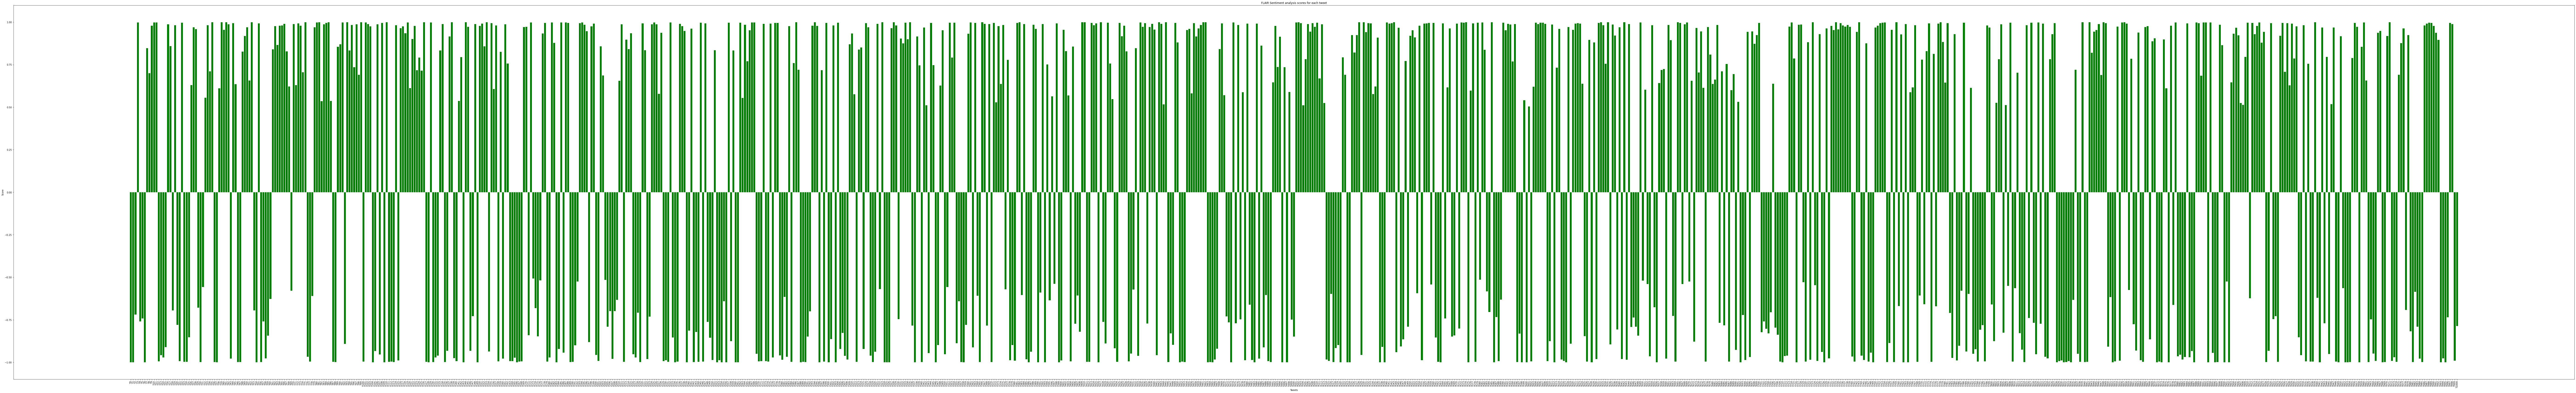

In [269]:
import matplotlib.pyplot as plt
import numpy as np

#selecting y to be flair scores
values = flair_list_compound

#selecting plot size
fig = plt.figure(figsize = (200, 30))
 

#rotating the x labels
plt.xticks(rotation=90)
#plotting
plt.bar(names,values,color='green', width = 0.8)
#labeling
plt.ylabel('Score')
plt.xlabel('Tweets')
plt.title("FLAIR Sentiment analysis scores for each tweet")

plt.show()

In [270]:
#looping to select 3 highest flair scores
for num in flair_list_compound:
    if num > 0.999727:
        print('Compound Score:',num,'Index', vs_list_compound.index(num))

0.9997609257698059 410
0.9997518658638 635
0.9997290968894958 665


In [271]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[410]

'me after finally locating the 6”4 comic-accurate Nightwing doll with oversized “body parts”, life-like rubber skin, removable latex suit, realistic Artificial Intelligence system with a varying range of SFX: https://t.co/dnceFLvtze'

In [220]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[635]

'AI Semiconductor\n\nEffective for Global Trends\nhttps://t.co/F0j3zlgRF9 is for sale!\n\n#AI #Semiconductor #AISemiconductor #ArtificialIntelligence #domainsforsale #domains #domainnames https://t.co/q6hO7DnlVt'

In [221]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[665]

'This project turns your text prompt into a 3D model for #gaming and #Metaverse !\n\nQuick read on the approach: https://t.co/3L3PkeA61x\n\n#3D #3dmodeling #NeuralNetworks #ML #ArtificialIntelligence #NFT #games #research https://t.co/73wN1gZRtq'

In [230]:
#looping to select 3 lowest flair scores
for num in flair_list_compound:
    if num < -0.999996:
        print('Compound Score:',num,'Index', vs_list_compound.index(num))

-0.9999961853027344 563
-0.9999979734420776 598
-0.9999970197677612 828


In [231]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[563]

'@processive6 @saintsoftness Absolutely. Forget technique even. Artificial intelligence does not understand ideology, in which we are drenched. It cannot stand outside of itself to examine its world--or its own consciousness. Throwing colors around does not make an artist.'

In [232]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[598]

'Chatbots could one day replace search engines. Here’s why that’s a terrible idea.\n\nhttps://t.co/Tcxm3aaIky\n\n#MachineLearning #AI #Python #DataScience #BigData\n#DeepLearning #IoT #100DaysOfCode #5G #robots #tech\n#ArtificialIntelligence #NLP #cloud #4IR #cybersecurity https://t.co/uNU8pEIVPG'

In [233]:
#displaying the tweet to manually see if sentiment analysis is preforming correctly.
hw_tweets_1[828]

"@KremlinTrolls I think Twatter uses 'artificial intelligence' bots to ban folk; bans happen too fast for the process to be manual. \nThese AI bots that are created by idiots who are not very intelligent. 🙄\nThe good news is that they will be the death of Twitter…"